In [1]:
from ondepi.applications import price_level as pl
from ondepi.visualisations import sample as plot_sample
from ondepi.resources import utils

In [2]:
symbol = 'INTC'
date = '2019-01-31'
price_level = 466000
direction = 1
std_size = 500
t0 = 1.05e3
t1 = 1.50e3
reset_time_origin = True

In [3]:
queue = pl.init_queue_on_lobster_data(
    symbol=symbol, date=date,
    price_level=price_level, direction=direction, std_size=std_size,
    t0=t0, t1=t1, reset_time_origin=reset_time_origin
)

symbol: INTC
date: 2019-01-31
direction: 1
price_level: 466000
std_size: 500
reset_time_origin: True


In [4]:
queue = pl.set_param(queue)

In [5]:
df_sample = queue.get_df_sample()

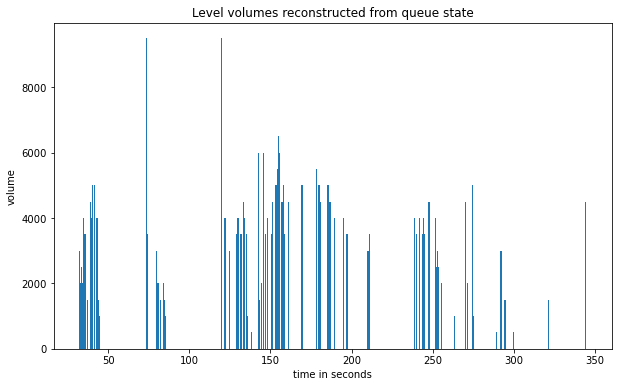

In [6]:
ax = plot_sample.plot_reconstructed_volumes(df_sample, std_size=std_size, time_range=None)

In [7]:
queue.simulate(max_time=1.0e3, max_events=1000, first_event=1, first_state=5)

In [8]:
df = queue.get_df_sample()

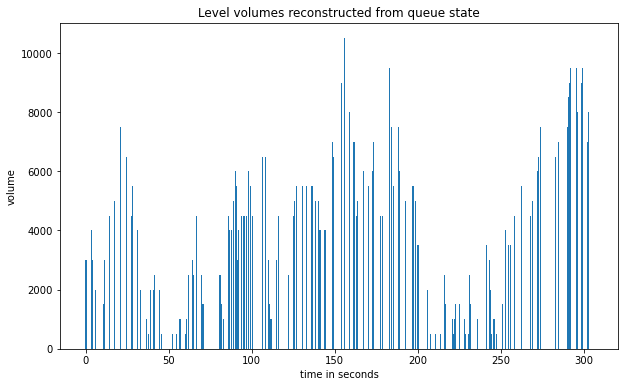

In [9]:
ax = plot_sample.plot_reconstructed_volumes(df, std_size=std_size, time_range=None, width=1.0e-1)

In [10]:
queue.filter(dt=7.5e-3, num_states=100)

In [11]:
df = pl.produce_df_detection(queue, beta=150.5)

In [12]:
df.describe()

,idx,time sample,time filter,state,expected val,variance,predictor,error,detector
count,9.990000e+02,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,1.558573e+11,155.857275,155.857275,8.514515,19.040531,214.993700,19.040531,-10.526016,-0.635297
std,8.743391e+10,87.433909,87.433909,5.175433,6.230081,109.838508,6.230081,6.160251,0.715432
min,0.000000e+00,0.000000,0.000000,0.000000,2.396845,0.000000,2.396845,-21.663664,-1.416740
25%,8.494376e+10,84.943762,84.943762,4.000000,17.035232,152.113062,17.035232,-14.713885,-1.012884
50%,1.587635e+11,158.763456,158.763456,9.000000,20.886566,242.266589,20.886566,-11.329375,-0.742783
75%,2.278616e+11,227.861592,227.861592,12.000000,22.426385,272.655159,22.426385,-7.718529,-0.531395
max,3.050583e+11,305.058264,305.058264,21.000000,28.850105,437.573747,28.850105,8.471926,8.381393


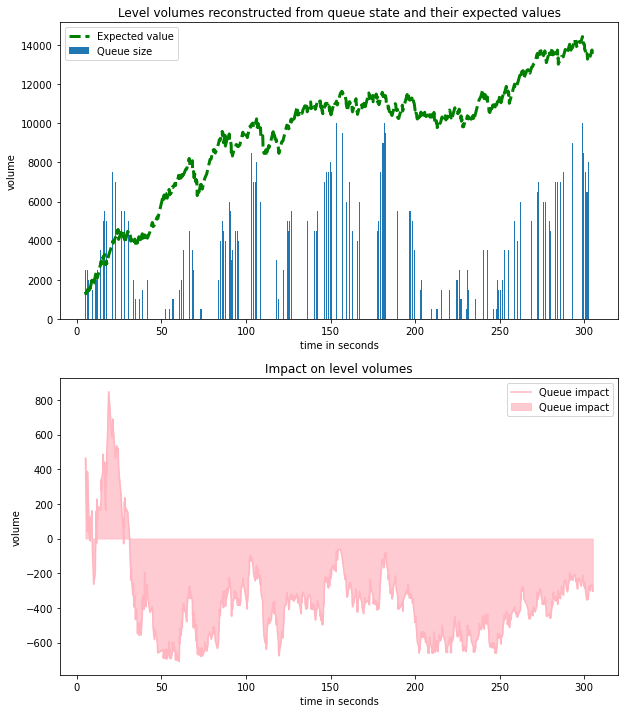

In [13]:
plot_sample.plot_detection_and_impact(df, time_range=(5, 500), std_size=std_size)